<a href="https://colab.research.google.com/github/LaSpi21/Protein_NQP_proportion/blob/main/contador_de_N%26Q.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Primera versión del contador de NQP




In [1]:
#@title Importar Librerias


!pip install biopython
import matplotlib.pyplot as plt
import re
from io import StringIO
from Bio import SeqIO
import numpy as np
from operator import add

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 26.3 MB/s eta 0:00:00


In [3]:
#@title Formulario
# @markdown Aquí van los parametros necesarios, se incluyen los valores por default y la secuencia de una variedad de SMAUGs de drosophilas.  

# @markdown Si en cambio se quiere utilizar un archivo FASTA como entrada arrastre el mismo a la carpeta "sample_data" de la columna izquierda, escriba el nombre del archivo fasta (sin extensión) y seleccione la casilla "Fasta_desde_archivo"  

# @markdown Ventana: cantidad de aminoacidos que se consideran en cada conteo   

# @markdown Paso: cantidad de aminoacidos que se avanzara en cada conteo

# @markdown Suavizado: 1 para informar el porcentaje de cada ventana. cualquier valor mayor  informará la media movil ponderada de tantas ventanas como se indique

# @markdown Umbral: se indicara una línea en el gráfico final a la altura indicada. 




Fasta_desde_archivo = False #@param {type:"boolean"}
Nombre_de_archivo = "" #@param {type:"string"}
Secuencias = ">drosophila_grimshawi MKYTTGTDNALPTSSSSNNSDLQTAATITQQQQSATTTTSAVNNTTAATTNPNTNTNPNP NPNPTTSNNQTDSNANGGEAQQSATQTTASPNNALFCEQVTTVTNLFEKWNDCERTVVMY ALLKRLRYPSLKFLQYSIDNNLTQNLGTCQTNLSSVVIDINANNPSYLQNLLSAYKTCQP SSDLCVLVDGMSSSSSDKDSMPCYGSDFQLTSTTSQHPRKEDLLHEVLNMLPLLKPGNEE AKLSYMTLIPLAVKDTVQQLVPTELVQQIFSYMFIHPAIGSDDRRSLNVWLRHLEDFIQA NKRSGSSSNSSGAGGSYFVQPEQLQLHAIVGTGTGNGTISDSSSSSSSSLGNLTRSVDWQ TIAPPSRHHHGKQLPRQPGEWRGSVSGSCGSINPLCDNLNGITLNELASSQNSLGLSLGS NSSLVNGVVAGAAAGSILGIGGNDDHDTSFSKNGTEILDFEPPLHGDAETPSGIASGSSL SQQQASSSHAAPTHAPPILPQLLQPPPPPPPPQLPYASILMGYVGDQFGDVNRWSLDSKI AALKTRRSNSLTTQTISSSCSSNSSNSSVITVNDNCSNSTENLAQFANKPRSFSLSIEHH RNNNNNNTLANSTSDPRLDDFKPSYIKFQTRNVGMSGIGLWLKSLRLHKYIELFKNMTYE EMLQISEEFLQSVGVTKGASHKLALCIEKLKERSHILGKVEQELHTGQMKISTAIEELTN IVLTPMKPLESLSGEENIGLRFLKVIDLVSNALQQDPYCAQDEETLGVFMWILDRSIHNE AFANHANQLKELKFKLSKLKMSMVPKLHHVKTTGGAAGNMNKPRWNGKSRKCDPKNGSND RINHRKNSNDMLNFSLSCLQHPLQQHHQQQQQQQPPPPQQFDYSGGYQTPVQYKSSSYPS FISNPQQQQQQQQQQQPLKHHSQHAQQMQQMLQQQQQQQHAQHFPALPQQTPPPHHRRSL NNLIVVAGGPQQPQQLIFKPGQGVLTNSTNDNLQHQQQRKPSLNGLSGLVSGSSSSSSSS SSGGEQQPKKTMAAVVMVSNSNQNESAQHQQQQQPQQQQPPPQILINNSNNNNNNNSSNN NNNSNILNNNLINHQQLQLLAAAAAAAAAMGNGGNCLCPGDGGSDNIVACSNSICQQPNN NNNNNNNNNNNTNNNNNMDQCLSQPQLINLSMSTLKDSFNMPPHDYKMNDFKSLEQLETL CRQMTEQAMN >drosophila_albomicans MKYTTGTDNALPSGSSSSQNALNELPQQSQQLQQEQQQAAVTTTTTTSAVNTTAATSTST TTKPNPSSTSSSNNSNQSDTNGETSPHATQAAVAAAAAATATGATKNALFCEQVTTVTNL FEKWNDCERTVVMYALLKRLRYPSLKFLQYSIDNNLTQNLGTCQTNLSSVVIDINANNPS YLQNLLAAYKACTSSDHLVEAAAGASSSSDKDSMPCYGSDFQITSSTNQCALDDRKLLTR KEDILQEVLNMLPLLKPGNEDAKLSYMTLISLAVKDTVQQQVPPEIVQQIFSYMLIHPAI SSEDRRALNVWLRHLEDYKQTTNKRGSCSSYFGQPEQLQLQLQLGVGAGAGTISDSSSSS SSSLGNLTRSVDWQTIAPPSRHHNSKQLPRQPGEWRGSVSGSCGSINPLCDNLNGITLNE LASSQNSLGLSLGSNSSLVNGVVAGAAAGSMLGLAGSDDHDTSFSKNGTEILDFEPLNNC DAATGGETSGIGSCSLSQQQAPSPHAPPVHSQLLQPPPPPPPPQLPYASILMGNVGDQFG DINRWSLDSKIAALKTRRSNSLTTQTISSCSSNSSNSSVITVNDNCSNSTENLAQFANKP RSFSLSIEHHRHNNNCMANSTSDTRLDDFKPSYIKFQTRNVGMSGIGLWLKSLRLHKYIE LFKNMTYEEMLQITEEFLQSVGVTKGASHKLALCIEKLKERAHILSKVEQELHTGQMKIS TAVEELTNIVLTPMKPLETIAGEENIGLRFLKVIDLVSNALQQDPYCAPEEETLGVFMWI LDRSIHNEAFVNHANQLKELKFKLSKLKMSMVPKLHHVKTTGGTSNNMNKPRWNGKSRKC DPKNASNDRINHRKNSNDMLNFSLNCLQHPLPHHQQQQQQQQQQQQQQQPPQQQFDFNGG YQTQQYKSSSYPSFMNNPQQQQQPQTLKHHSQHAQQMQQILQQHAQHFPALPQQTPPPHH RRSLNNLIVVAGGPQQPQQLIFKPGQGVLTNSNNDNLQQQQQQRKPSLNGLSSGLSATAI VEQQQQPKKTMAAVVMENLAKFDQHFTLF >drosophila_virilis MKYTTGPDNALPTGSSSSSSDSQNPLNELQSGVTSTQQQQQQQQLQEQQSVVTTSAGTTA AATSNPNPNPNTDNQADTNANGDAQQPATQAATNALFCEQVTTVTNLFEKWNDCERTVVM YALLKRLRYPSLKFLQYSIDNNLTQNLGTCQSTLSSVVIDINANNPAYLQNLLSAYKTCQ SNDLVDGMSSSSSDKDSMHCYGSDFQITSSTNPTQCADERKLYARKEDILHEVLNMLPLL KPGNEEAKLSYMMLIPLAVKDTAQQLVPTELVQQIFSYMLIHPAIGSDDRRSLNVWLRHL EDHIQANKRSSYFVQPEQLQLQMTTGTTSDSSSSSSSSLGNLTRSVDWQTIAPPSRHHSK QLPRQPGEWRGSVSGSCGSINPLCDNLNGITLNELASSQNSLGLSLGSNSSLVNGVVAGA AAGSILGIGGNDDHDTSFSKNGTEILDFEPTHCDGVVNGSAETSGICSANISQQQTPSQA ASILPQLLQPPPPPPPPQLPYASILMGYVGDQFGDVNRWSLDSKIAALKTRRSNSLTTQT ISSCSSNSSNSSVITVNDNCSNSTENLAQFANKPRSFSLSIEHHRANSTLPNSTSDTRLD DFKPSYIKFQTRNVGMSGIGLWLKSLRLHKYIELFKNMTYEEMLQISEDFLQSVGVTKGA SHKLALCIEKLKERSHILSKVEQELQTGQMKISTAIEELTNIVLTPMKPLESISEEENIG LRFLKVIDLVSNALQQDPYCAQDEETLGVFMWILDRSIHNEAFVNHANQLKELKFKLSKI KMSMVPKLHHVKTTGGTTSNMNKPRWNGKTRKCDPKNGSNDRINHRKNSNDMLNFSLNCL QHPLQHHQQQQQQPPPQQQFDYNGGYQTQQYKSSSYPSFMNNPQQHQQQPPKHHSQHAQQ MQQILQQHAQHFPALPQQTPPPHHRRSLNNLIVVAGGPQQPQQLIFKPGQGVLTNSTNDN LQQQQQRKPSLNGLTGSNGVSTVEQQPKKTMAAVVMENLAKFDQHFTLF >drosophila_hydei MKYTTGTDNALPTGSSSSTDPQNALNEVQSGVTTTQQQQPEQQQQQLQEQQLVATTSSGQ STAAASNPNLNPNANPNPSNNNQIDTNANNSDTAPASAAATTATATTTNALFCEQVTTVT NLFEKWNDCERTVVMYALLKRLRYPSLKFLQYSIDNNLTQNLGTCQSTLNSVVIDINANN PAYLQNLLSAYKTCQPNDLVEGMSSSSSDKDSMHCYGSDFQITSTNATQMSGDERKLCVR KEDILHEVLNMLPLLKPGNEEAKLTYMMLIPLAVKDTAQQLVPTELVQQIFSYMLIHPAI GSDDRRSLNVWLRHLEDYIQANKRSSFFVQPDQLQLQLQMATGAISDSSSSSSSSLGNLT RSFDWQTIAPPSRHHSKQLPRQPGEWRGSVSGSCGSINPLCDNLNGITLNELASSQNSLG LSLGSNSSLVNGVVAGAAAGSIMGIGGNDDHDTSFSKNGTEILDFEPIHCDGASNGTAET SGICSASLSQQQSPSQAASILPQLLQPPPPPPPHQLAYSSILMGYVGDQFGDVNRWSLDS KIAALKTRRSNSLTTQTISSCSSNSSNSSVITVNDNCSNSTENLAQFANKPRSFSLSIEH HRANSTLPNSTSDTRLDDFKPSYIKFQTRNVGMSGIGLWLKSLRLHKYIELFKNMTYEEM LQISEEFLQSVGVTKGASHKLALCIEKLKERSHILSRVEQDLHTGQMKISNAIEELTNIV LTPMKPLESNSGEDNIGLRFLKVIDLVSNALQQDPYCVPDEETLGVFMWILDRSIHNEAF VNHANQLKELKFKLSKIKMSMVPKLHHVKTASGTTSNMNKPRWNGKTRKCDPKNGSTDRI NHRKNSNDMLNFSLSCLQHPIQHHQQQQQQQQQQQQQQQQQQQQQFDYNGGYQTQQYKSS SYPNFMNNPQQQQQQPQKHHSQQMQQMLQQHAQHFPALPQQTPPPHHRRSLNNLIVVAGG PQQPQQLIFKPGQGILTNSNNNDNLQQQQQRKPSLNGLTNGSNLISTVEQQPKKTMAAVV MENLAKFDQHFTLF >drosophila_mojavensis MKYTAGTDNALPTGSSSNSNSSTDPQNALNELQSGVTATQQQLQEQQLAATTSCGLSTAA ASNSNLNPSPNPSNSNQIDTNAANNSDTTPATATSTATTATATVTASNALFCEQVTTVTN LFEKWNDCERTVVMYALLKRLRYPSLKFLQYSIDNNLTQNLGTCQSTLNSVVIDINANNP AYLQNLLSAYKACQPNDLAEGMSSSSSDKDSMHCYGSDFQITSSTNAAQLSGDERKLCAR KEDILHEVLNMLPLLKPGNEEAKQTYMMLIPLAVKDTAQQLVPTELVQQIFSYMLIHPAV GSDDRRSLNVWLRHLEDYIQANKRSSFFVQPDPLQLQLQMATGAISDSSSSSSSSLGNLT RNVDWQTIAPPSRHHSKQLPRQPGEWRGSVSGSCGSINPLCDNLNGITLNELASSQNSLG LSLGSNSSLVNGVVAGAAAGSIIGLGGNEDHDTSFSKNGTEILDFEPLHSDGVGNGTAET SGICSANLSQQQTPTQAAAILPQLLQPPPPPPPHQLAYSSILMGYVGDQFGDVNRWSLDS KIAALKTRRSNSLTTQTISSCSSNSSNSSVITVNDNCSNSTENLAQFANKPRSFSLSIEH HRANSTLPNSTSDTRLDDFKPSYIKFQTRNVGMSGIGLWLKSLRLHKYIELFKNMTYEEM LQISEEFLQSVGVTKGASHKLALCIEKLKERSHILSRVEQELHTGQMKISTAIEELTNIV LTPMKPLESNSGEDNIGLRFLKVIDLVSNALQQDPYCVPDEETLGVFMWILDRSIHNEAF VNHANQLKELKFKLSKIKMSMVPKLHHVKTTSATTSNMNKPRWNGKARKCDPKNGSNDRI NHRKNSNDMLNFSLNCLQHPIQHHQQQQQQQQQQQQQQQQFDYNGGYQTQQYKSSSYPNF MNNPQQQQQQQQQQQPPKHHSQHAQQMQQMLQQHAQHFPALPQQTPPPHHRRSLNNLIVV AGGPQQPQQMIFKPGQGILTNSNNNNDNLQQQQQQQQRKPSLNGLTTGPNLISTVEQQPK KTMAAVVMVSNVNQTESNQQQQQQQQPPQILISSNNNSSNNNNSSNNHNNNNNNLLNNNS INHQQLQLLAAAAAAAAVGNGGCLCPGDGCGDDVVACSAICNNNNNNNNNNNFNNNNNNR DHCLSQPQLINLSMASLKEGFNMPPHDYKLNDFKSLEQLETLCRQMTEQAMN >drosophila_navojoa MKYTAGTDNALPTGSSSNSNSSADPQNALNELQSGVTATQQQLQEQQLAATTSCGLSTAA ASNPNINPSPNPSNSNQIDTNAANNSGTTPATATSTATTATATVAASNALFCEQVTTVTN LFEKWNDCERTVVMYALLKRLRYPSLKFLQYSIDNNLTQNLGTCQSTLNSVVIDINANNP AYLQNLLSAYKACQPNDLAEGMSSSSSDKDSMHCYGSDFQITSSTNAAQLSGDERKLCAR KEDILHEVLNMLPLLKPGNEEAKQTYMMLIPLAVKDTAQQLVPTELVQQIFSYMLIHPAI GSDDRRSLNVWLRHLEDYIQANKRSSFFVQPDPLQLQLQMATGTISDSSSSSSSSLGNLT RNVDWQTIAPPSRHHSKQLPRQPGEWRGSVSGSCGSINPLCDNLNGITLNELASSQNSLG LSLGSNSSLVNGVVAGAAAGSIIGLGGNEDHDTSFSKNGTEILDFEPLHSDDVGNGTAET SGVCSASISQQQTPSQAAAILPQLLQPPPPPPPHQLAYSSILMGYVGDQFGDVNRWSLDS KIAALKTRRSNSLTTQTISSCSSNSSNSSVITVNDNCSNSTENLAQFANKPRSFSLSIEH HRANSTLPNSTSDTRLDDFKPSYIKFQTRNVGMSGIGLWLKSLRLHKYIELFKNMTYEEM LQISEEFLQSVGVTKGASHKLALCIEKLKERSHILSRVEQELHTGQMKISTAIEELTNIV LTPMKPLESNSGEDNIGLRFLKVIDLVSNALQQDPYCVPDEETLGVFMWILDRSIHNEAF VNHANQLKELKFKLSKIKMSMVPKLHHVKTTSATTSNMNKPRWNGKGRKCDPKNGSNDRI NHRKNSNDMLNFSLNCLQHPIQHHQQQQQQQQQQQQQQQQQQQQQFDYNGGYQTQQYKSS SYPNFMNNPQQQQQQQQQQQQPPPKHHSQHAQQMQQMLQQHAQHFPALPQQTPPPHHRRS LNNLIVVAGGPQQPQQMIFKPGQGILTNSNNNNDNLQQQQQQQRKPSLNGLTTGSNLIST VEQQPKKTMAAVVMVSNANQTESSQQQQQQQQPPQILISSNNNNSNNNNSSNNNNNNNNN LLNNNSINHQQLQLLAAAAAAAAVGNGGCLCPGDGCGDDVVACSAICNNNNNNNNNNNFT NNNNNNNNRDHCLSQPQLINLSMASLKEGFNMPPHDYKLNDFKSLEQLETLCRQMTEQAM N >drosophila_lebanonensis MKYTTNTDNALLSSSSSGNSSSSSSNVALNEVQQQQHQQQVNSPIQQGEQEREQHISSST TTSTASSGSGATTSTTTATTTTASNSALFCEQVGTVTNLFEKWNDCERTVVMYALLKRLR YPSLKFLQYSIDNNLTQNLGSSQSNLSSVVIDINANNPAYLQNLLNAYKTFQPCDVLDAM SSSSSDKDSMPCYGSDFQITTTAQCDERKLYARKEDILNEVLNMLPLLKPGNEEAKSNYL TLIPVAVKDTMQQIVPTELVQQIFSYLLIHPAISSEDRRSLNVWLRHLEDHIQAAAAGIT NRSYFLQPSPHLSADHLVSSGNSQHSAGTMSTSGSSTASSSAASSSAASCSSVASSSLGN LAPHTCSSNSNSSQTSSSHTPRGNDWQTIAPPSKQHKIGDWRSSGGGSGSGSINPLCDNL NGITLNELASSQNSLGLSLDSSSLVNGVVAGATGSGASLFGNGNSSIIAILGGGVAGGSD DHDTSFSKNGTEILDFEPDCDKCVGVSLGDASTSGNIGSNLCQQHAHSQQQQQQQMLQPP STSQVSQQLPYASILMGYDQIGDINRWSLDSKIAALKTRRSNSLTTQTISSSSSSSNSSV ITVNDNCSNSTENLAQFANKPRSFSLSIEHQRGGLTNSGSDTRLDEFKPSYIKFQTRNVG MSGIGLWLKSLRLHKYIELFKNMTYEEMLHISEEFLQSVGVTKGASHKLALCIEKLKDRP HILNKLEQELHKGTMKIGTAVEELTSIVLTPMKPLEAVAPSEENIALRFLKVIDLVSNAL QQDPYCTQDDETLGVFMWILDRSIHNEAFVNHANQLKELKFKLSKLKMSMVPKLHHVKAA PSNGSTINKPRWSGKTRKCDTKNGSNDRINHRKNSNDMLNFSLSCLPHPLAPPPHHQQQQ QSPYGNDYNGYGSHSHQPQYKSSSYPSFMNNPQSMKHHQPPPSTAQQQQQQQQQMQQMLQ QHAHFPALPQQTPQQQQPPQPHHRRSLNNLIVVAGGPQQPQQLIFKPGQGVLTTTSNDNL HLDGASVSRNQQQQHQQRKQSLNGLTSNVSLNSNSSGSSNNNNSSSSANGVEPKKTMAAV VMENLAKFDQHFTLF >drosophila_willistoni MKYSTGIDNALPSSGSSSNSSLSASSSNYPLNEMHTSHKKEPTIATVTATTTSAASTAVM TSMVAATKLPTNDPTSTTSNSSNLQSQPTNALFCEQVTTVTNLFEKWNDCERTVVMCALL KRLRYPSLKFLQYSIDNNLTQNLGTSQTNLSSVVIDINANNPAYLQNLLNAYKTFQPCDV LDVMSSSSSDKDSMPCYGSDFQITTTAQCDERKLYARKEDILHEVLNMLPLLKPGNDEAK LSYLTLIPVAVKDTMQQIVPTELVQQIFSYLLIHPAISSEDRRSLNVWLRHLEDHIQAAA AGITNCSYFLQPSPAPQVVQRGSSSAASLLSAASCSSLASSSHGNGRSSDWQTIAPPTKL QQQQQQQQQHKLTSGGDWRGSNSNGSINPLCDNLNGITLNELGSSQNSLGLSLESSSSLV NGVVAGAAAGSILGLSGSDDHDTSFSKNGTEILDFEPLNEVGSSSSNVSGAGGGGVTNTN TSHLCPPQQQQQQVSGDIVDIDILIDHLQAAAVAAAAVPALSSTQLLQPPPSNSASHNPH PHPHYASILMGHAGGGAGSGDQFGDVNRWSLDSKIAALKTRRSNSLTTQTISSCSSSSNS SVITVNDNCSNSTENLAQFANKPRSFSLSIEHQRGALANSGSDTRLDEFKPSYIKFQTRN VGMSGIGLWLKSLRLHKYIELFKNMTYEEMLQITEDFLQSVGVTKGASHKLALCIEKLKE RDHILGKVEQDLHTGQMKLSTAVEELTNIVLTPMKPLEAIGPPEENIALRFLKVINLVSN ALQQDPYCVQDDDTLGVFMWILDRTIHNEAFMNQANQLKELKFKLSKLKMSMVPKLHHVK TTGGATGGGNINKPRWNGKSRKCDPKNGSNDRINHRKNSNDMLNFSLSCLQQPPPPHQQQ QQQQQQQQFDYNNGYGGPPHQPQYKSSSYPSFQQQQPPPQANKPHHHVQQMQQMMQQHNH FPALPQHTPPQAHRRSLNNLIVVAGGPQQPQQLIFKPGQGVLTNNSPNDSSNSLLMDRSH QRKPSLNGLSGGGSGGGGGGVSAESQPKKTMAAVVMVSNSQQQDPNDQPSPPQILINNNN NNVLNNNLINQQQLQLLAAAAAAVGNGSCLCSNGSGGVACINNLCQPSNNINLGMSTAAH EYKMNDYKSLEQLETLCRQMTEQAMN >drosophila_guanche MKYSTGTTDNGMSCGIDSNSNSNSALNDMQPTTSTPTQAHSHKEAISTTTPAKTGDAQTT HTNTNTNTIANSNCNSNPNPHKPPNALFCEQVTTVTNLFEKWNDCERTVVMYALLKRLRY PSLKFLQYSIDNNLTQNLGTSQTNLSSVVIDINANNPVYLQNLLNAYKTFQPCDVLDGMS SSSSDKDSMPCYGSDFQITTSSQCDERKLYARKEDILHEVLNMLPLLKPGNDEAKLIYMT LIPAAVKDTMQQIVPTELVQQIFSYLLIHPAISNEDRRSLNIWLRHLEDHIQAAAAGLTN RSYFLQPSPQLVAGTSSTGSSSAASSSAASCSSVASSSLSNLGSSLCTTSTTSSSRSSRS NDWQTIAPPSKQQQQQHKLTGGDWRGSGGSSGSINPLCDNLNGITLNELASSQNSLGLSL DNSSLLVNSVVAGAAAGSMLVIGGTDDHDTSFSKNGTEIIDFEPPTLADVGEASGISNLC QQPSSHHLQQQLLQPPPSGPQLPYASILMGNVGDQFGDINRWSLDSKIAALKTRRSNSLT TQTISSCSSSSNSSVITVNDNCSNSTENLAQFANKPRSFSLSIEHQRGAMANSGSDTRLD EFKPGYIKFQTRNVGMSGIGLWLKSLRLHKYIELFKNMTYEEMLMITEDFLQSVGVTKGA SHKLALCIDKLKERAHILSRVEQELHTGQMKLSAAVEELTHIVLTPMKPVEAMGPPEENI GHRFLKVIDLVSNAVQADPYCIQDDETMGVFMWILDRSIHNEAFMNHANQLKELKFKLSK LKISMVSKMHHVKTTGVPTGGNINKPRWNGKSRKCDTKNGSNDRINNRKNSNDMLNFSLN CLQHPLPHHQQQQQPPPPPLQQFEYNGYGGPSHQPQYKSSSYPSFMNNPQQQQQPLKSHH HAQQMQQMLQQHNHFPALPQQPAPQTHRRSLNNLILVSGGPQQPQQMIFKPGQGVLTNNN GSNDSLVMDSRSQQQQQQPRKPSLNGLTGNGSVNGGVSSSEQHPKKTMAAVVMENLAKFD QHFTLF >drosophila_subobscura MKYSTGTTDIGMSCGIDSNSNSNNALNDMQPTTSTPTQAHSHKEAISTTTPAKTGAAQTT HTNTNTNTIANSNCNSNPNPHQPANALFCEQVTTVTNLFEKWNDCERTVVMYALLKRLRY PSLKFLQYSIDNNLTQNLGTSQTNLSSVVIDINANNPVYLQNLLNAYKTFQPCDVLDGMS SSSSDKDSMPCYGSDFQITTSSQCDERKLYARKEDILHEVLNMLPLLKPGNDEAKLIYMT LIPAAVKDTMQQIVPTELVQQIFSYLLIHPAISSEDRRSLNIWLRHLEDHIQAAAAGLTN RSYFLQPSPQLVAGTSSTGSSSAASSSAASCSSVASSSLSNLGSSLCTTSTTSSSRSSRS NDWQTIAPPSKQQQQQQHKLTGGDWRGSGGSSGSINPLCDNLNGITLNELASSQNSLGLS LDNSSLLVNSVVAGAAAGSMLGIGGTDDHDTSFSKNGTEILDFEPPTLADVGEASGISNL CPQPSSHHLQQQLLQPPPSGPQLPYASILMGNVGDQFGDINRWSLDSKIAALKTRRSNSL TTQTISSCSSSSNSSVITVNDNCSNSTENLAQFANKPRSFSLSIEHQRGAMANSGSDTRL DEFKPGYIKFQTRNVGMSGIGLWLKSLRLHKYIELFKNMTYEEMLMITEDFLQSVGVTKG ASHKLALCIDKLKERAHILSRVEQELHTGQMKLSAAVEELTHIVLTPMKPVEAMGPPEEN IGHRFLKVIDLVSNAVQADPYCIQDDETMGVFMWILDRSIHNEAFMNHANQLKELKFKLS KLKISMVSKMHHVKTAGVPTGGNINKPRWNGKSRKCDTKNGSNDRINNRKNSNDMLNFSL NCLQHPLPHHQQQQQPPPPPLQQFDYNGYAGPSHQPQYKSSSYPSFMNNPQQQQQQQQPL KSHHHAQQMQQMLQQHNHFPALPQQAAQQTHRRSLNNLILVTGGPQQPQQMIFKPGQGVL TNNNGSNDSLVMDSRSQQPQQQPRKPSLNGLTGNGSVNGGVSSSEQHPKKTMAAVVMVSS SQNQESQQSEQQHTPQILINNNNNNILNNNLINQQQLQLLAAAAAAVGSGSCLCPGPGGG GGNSGACSNNLCLQSSKNNNHTADHCLSQPQRQLISLSMAPHEYKMNDFKSLEQLETLCR QMTEQAMN >drosophila_obscura MKYSTGTTDNAMSCGIDSNSNCALNDMQPTTSTPTQAHSHKEAISSTTPAKTGAAQTTHT NNNTIANSNCNSNPHQPANELFCEQVTTVTNLFEKWNDCERTVVMYALLKRLRYPSLKFL QYSIDNNLTQNLGTSQTNLSSVVIDINANNPVYLQNLLNAYKTFQPCDVLDGMSSSSSDK DSMPCYGSDFQITTSSQCDERKLYARKEDILHEVLNMLPLLKPGNDEAKLIYMTLIPAAV KDTMQQIVPTELVQQIFSYLLIHPAISSEDRRSLNIWLRHLEDHIQAAAAGLTNRSYFLQ PSPQLVAGTSSTGSSSAASSSAASCSSVASSSLSNLGSSLCTTSSSRSSRSNDWQTIAPP SKQQQQQQQHKLTGGDWRGSGGSSGSINPLCDNLNGITLNELASSQNSLGLSLDNSSLLV NSVVAGAAAGSMLGIGGTDDHDTSFSKNGTEILDFEPPTLADVGEASGISNLCQQLLQPP PPGPQLPYASILMGNVGDQFGDINRWSLDSKIAALKTRRSNSLTTQTISSCSSSSNSSVI TVNDNCSNSTENLAQFANKPRSFSLSIEHQRGALANSGSDTRLDEFKPGYIKFQTRNVGM SGIGLWLKSLRLHKYIELFKNMTYEEMLMITEDFLQSVGVTKGASHKLALCIEKLKERAH ILSRVEQELHTGQMKLSTAVEELTHIVLTPMKPVESMGPPEENIGHRFLKVIDLVSNAVQ ADPYCVQDDETMGVFMWILDRSIHNEAFMNHANQLKELKFKLSKLKISMVSKLHHVKTSG VPTGGNINKPRWNGKSRKCDPKNGSNDRINNRKNSNDMLNFSLNCLQHPVPHHQQQQQPP PPPLQQFDYNGYGGPSHQPQYKSSSYPSFMNNPQQQQQPLKSHHHAQQMQQMLQQHNHFP ALPQQTPPQTHRRSLNNLILVTGGPQQPQQMIFKPGQGVLTTNNGSNDSLVMDSRSQQQQ PRKPSLNGLSGNGSVNGGVSSSEQHPKKTMAAVVMVSSNQSQESQQSDQQLPPQILINNN NNNNILNNNLINQQQLQLLAAAAAAVGSGSCLCPGPGGGGGIGACSNNLCQQSSKNNNHT ADHCLSQPQHQLISLSMAPHEYKMNDFKSLEQLETLCRQMTEQAMN >drosophila_miranda MKYSTSTTDNAMSCGIDSNTNSNSALNDMQPKTSTPTQTHSQKEATSTTTPAKTGATQMH TTHTNTIANSNCNSNPHQPANALFCEQVTTVTNLFEKWNDCERTVVMYALLKRLRYPSLK FLQYSIDNNLTQNLGTSQTNLSSVVIDINANNPVYLQNLLNAYKTFQPCDVLDGMSSSSS DKDSMPCYGSDFQITTSSQCDERKLYARKEDILHEVLNMLPLLKPGNDEAKLIYMALIPA AVKDTMQQIVPTELVQQIFSYLLIHPAISSEDRRSLNIWLRHLEDHIQAAAAGLTNRSYF LQPSPQLVAGTSSTGSSSAASSSAASCSSVASSSLSNLGSSLCTTSSSRSSRSNDWQTIA PPSKQQQQQHKLTGGDWRGSGGSSGSINPLCDNLNGITLNELASSQNSLGLSLDSSSLLV NSVVAGAAAGSMLGIGGTEDHDTSFSKNGTEILDFEPPIMADVGEASGISNLCQQVREKG ARSNLINIILNDRLQPPTSHHHHQQLLLPPPSGPQLPYASILMGNVGDQFGDINRWSLDS KIAALKTRRSNSLTTQTISSCSSSSNSSVITVNDNCSNSTENLAQFANKPRSFSLSIEHQ RGALANSGSDTRLDEFKPGYIKFQTRNVGMSGIGLWLKSLRLHKYIELFKNMTYEEMLMI TEEFLQSVGVTKGASHKLALCIDKLKERAHILSRVEQELHAGQMKLSTAVEELTHIVLTP MKPVESMGPPEENIGHRFLKVIDLVSNAVQADPYCVQDDETMGVFMWILDRSIHNEAFMN HANQLKELKFKLSKLKISMVSKLHHVKTPGVPTGGNINKPRWNGKTRKCDPKNGSSDRIN NRKNSNDMLNFSLNCLQHPLPHHQQQQQPPPPPLQQFEYNGYGGPSHQPQYKSSSYPSFM SNHQQQQQQPPKSHHHAQQMQQMLQQHNHFPALPQQTPPQSHRRSLNNLILVTGGPQQPQ QMIFKPGQGVLTTNTNGSNDSLVMDSRSQQQPRKPSLNGLSANGNGGVSSSEQHPKKTMA AVVMVSSQSQESQHSDHQHPPQILINNNNNNNILNNNLINQQQLQLLAAAAAAVGSGSCL CPCPGGGGGSGGACSNTLCQQSSKNNNHTADHCLSQPQHQLISLSMAPHEYKMNDFKSLE QLETLCRQMTEQAMN >drosophila_pseudoobscura MKYSTGTTDNAMSCGIDSNTNSNSALNDMQPKTSTPTQTHSHKEATSTTTPAKTGATQMH TTHTNTIANSNCNSNPHQPANALFCEQVTTVTNLFEKWNDCERTVVMYALLKRLRYPSLK FLQYSIDNNLTQNLGTSQTNLSSVVIDINANNPVYLQNLLNAYKTFQPCDVLDGMSSSSS DKDSMPCYGSDFQITTSSQCDERKLYARKEDILHEVLNMLPLLKPGNDEAKLIYMALIPA AVKDTMQQIVPTELVQQIFSYLLIHPAISSEDRRSLNIWLRHLEDHIQAAAAGLTNRSYF LQPSPQLVAGTSSTGSSSAASSSAASCSSVASSSLSNLGSSLCTTSSSRSSRSNDWQTIA PPSKQQQQQHKLTGGDWRGSGGSSGSINPLCDNLNGITLNELASSQNSLGLSLDSSSLLV NSVVAGAAAGSMLGIGGTEDHDTSFSKNGTEILDFEPPIMADMGEASGISNLCQQPPTSH HQQLLQPPPSGPQLPYASILMGNVGDQFGDINRWSLDSKIAALKTRRSNSLTTQTISSCS SSSNSSVITVNDNCSNSTENLAQFANKPRSFSLSIEHQRGALANSGSDTRLDEFKPGYIK FQTRNVGMSGIGLWLKSLRLHKYIELFKNMTYEEMLMITEEFLQSVGVTKGASHKLALCI DKLKERAHILSRVEQDLHAGQIKLSTAVEELTHIVLTPMKPVESMGPLEENIGHRFLKVI DLVSNALQADPYCVQDDETMGVFMWILDRSIHNEAFMNHANQLKELKFKLSKLKISMVSK LHHVKTPGVPTGGNINKPRWNGKTRKCDPKNGSSDRINNRKNSNDMLNFSLNCLQHPLPH HQQQQQQQPPPPPLQQFEYNGYGGPSHQPQYKSSSYPSFMSNHQQQQQQPPKSHHHAQQM QQMLQQHNHFPALPQQTPPQSHRRSLNNLILVTGGPQQPQQMVFKPGQGVLTTNTNGSND SLVMDSRSQQQPRKPSLNGLSANGNGGVSSSEQHPKKTMAAVVMVSSQSQESQHSDHQHP PQILINNNNNNNILNNNLINQQQLQLLAAAAAAVGSGSCLCPCPGGGGGSGGACSNTLCQ QSSKNNNHTADHCLSQPQHQLISLSMAPHEYKMNDFKSLEQLETLCRQMTEQAMN >drosophila_persimilis MKYSTGTTDNAMSCGIDSNTNSNSALNDMQPKTSTPTQTHSHKEATSTTTPAKTGATQMH TTHTNTIANSNCNSNPHQPANALFCEQVTTVTNLFEKWNDCERTVVMYALLKRLRYPSLK FLQYSIDNNLTQNLGTSQTNLSSVVIDINANNPVYLQNLLNAYKTFQPCDVLDGMSSSSS DKDSMPCYGSDFQITTSSQCDERKLYARKEDILHEVLNMLPLLKPGNDEAKLIYMALIPA AVKDTMQQIVPTELVQQIFSYLLIHPAISSEDRRSLNIWLRHLEDHIQAAAAGLTNRSYF LQPSPQLVAGTSSTGSSSAASSSAASCSSVASSSLSNLGSSLCTTSSSRSSRSNDWQTIA PPSKQQQQQHKLTGGDWRGSGGSSGSINPLCDNLNGITLNELASSQNSLGLSLDSSSLLV NSVVAGAAAGSMLGIGGTEDHDTSFSKNGTEILDFEPPIMADVGEASGISNLCQQVIEKE ARSNLINIILNDRLQPPTSHHQQLLQPPPSGPQLPYASILMGNVGDQFGDINRWSLDSKI AALKTRRSNSLTTQTISSCSSSFNSSVITVNDNCSNSTENLAQFANKPRSFSLSIEHQRG ALANSGSDTRLDEFKPGYIKFQTRNVGMSGIGLWLKSLRLHKYIELFKNMTYEEMLMITE EFLQSVGVTKGASHKLALCIDKLKERAHILSRVEQDLHAGQIKLSTAVEELTHIVLTPMK PVESMGPLEENIGHRFLKVIDLVSNAVQADPYCVQDDETMGVFMWILDRSIHNEAFMNHA NQLKELKFKLSKLKISMVSKLHHVKTPGVPTGGNINKPRWNGKTRKCDPKNGSSDRINNR KNSNDMLNFSLNCLQHPLPHHQQQQQQQPPPPPLQQFEYNGYGGPSHQPQYKSSSYPSFM SNHQQQQQPPKSHHHAQQMQQMLQQHNHFPALPQQTPPQSHRRSLNNLILVTGGPQQPQQ MVFKPGQGVLTTNTNGSNDSLVMDSRSQQQPRKPSLNGLSANGNGGVSSSEQHPKKTMAA VVMVSSQSQESQHSDHQHPPQILINNNNNNNILNNNLINQQQLQLLAAAAAAVGSGSCLC PCPGGGGGSGGACSNTLCQQSSKNNNHTADHCLSQPQHQLISLSMAPHEYKMNDFKSLEQ LETLCRQMTEQAMN >drosophila_kikkawai MKYQTGTTDNSASAHEMHQLPSTSTPKEAAATAVAATTTATQANGNSNPNPNPSQNQNQA SNALFCEQVTTVTNLFEKWNDCERTVVMYALLKRLRYPSLKFLQYSIDSNLTQNLGTSQT NLSSVVIDINANNPAYLQNLLNAYKTFQPCDLLDAMSSSSSDKDSMPCYGSDFQITTSAQ CDERKLYARKEDILHEVLNMLPLLKPGNEEAKLIYLTLIPVAVKDTMQQIVPTELVQQIF SYLLIHPAITSDDRRSLNIWLRHLEDHIQAAAAGLTNRSYFLQPSPQLVAGGSSTGSGSC SSSAASSSTASCSSVASGSRSSRTNDWQTIAPPSKQLQLKLAGSGDWRGSAGGAGAGGSS NGSINPLCDNLNGITLNELASSQNSLGLSLEGSSSLVNGVVAGAAAGSMLGIGGGDDHDT SFSKNGTEILDFDPSTADMGEACSSSSLASTSNLCRNSSAVDALNDRLQPPQHLQQQQFL QAPPYASILMGNVGDQFGDINRWSLDSKIAALKTRRSNSLTTQTISSCSSSSNSSVITVN DNCSNSTENLAQFANKPRSFSLSIEHQRGALANSGSDTRLDEFKPNYIKFHTRNVGMSGI GLWLKSLRLHKYIELFKNMTYEEMLLITEDFLQSVGVTKGASHKLALCIEKLKERAHILG RVEQELITGQMKLSTAVEELTNIVLTPMKPVEAIGPPEENIGLRFLKVIDIVSNTLQQDP YAAQDDETLGVFMWILDRSIHNEAFMNHANQLKELKFKLSKLKISMVPKLHHVKPGVVSG PSNGSINKPRWNGKTRKCDTKNGSNDRINNRKNSNDMLNFSLNCLQHPLPHHPQQQQPLP PPPLPQFDYNGYGGGPSHQPQYKSSSYPSFMGNPQQQQPLKPHHHAQQMQQMLQQHNHFP ALPQQTPPQSHRRSLNNLILVAGGPQQPQQLIFKPGQGVLTNSGSNDSLVMERNQQQQQR KLSGNGGTLSSGEQQPKKTMAAVVMENLAKFDQHFTLF >drosophila_ficusphila MKYATGTDNAMTSGISGPSQNTNSASKEMQPTTSTPTAAHKEAANTSTATTTATHANGNS NSSQSQPSNALFCEQVTTVTNLFEKWNDCERTVVMYALLKRLRYPSLKFLQYSIDSNLTQ NLGTSQTNLSSVVIDINANNPVYLQNLLNAYKTFQPCDLLDAMSSSSSDKDSMPCYGSDF QITTSAQCDERKLYARKEDILHEVLNMLPLLKPGNEEAKLIYLALIPVAVKDTMQQIVPT ELVQQIFSYLLIHPAISSEDRRSLNIWLRHLEDHIQAAAAGLTNRSYFLQPSPQLVAGGS STGSGSCSSSAASSSTASCSSVASSSLCPASGSRSSRTNDWQTIAPPSKQLQHKLAGEWR SSGGGSSSGSINPLCDNINGITLNELASSQNSLGLSLENSSSLVNGVVAGAGSMLGIAGG DDHDTSFSKNGTEILDFDPVTADLGEACSLASGTSAEDRLQPPPHLQQQLLQPPPYASIL MGNVGDQFGDINRWSLDSKIAALKTRRSNSLTTQTISSCSSSSNSSVITVNDNCSNSTEN LAQFANKPRSFSLSIEHQRGALINSGSDTRLDEFKPNYIKFYSRNLGMSGIGLWLKSLRL HKYIELFKNMTYEEMLLITEDFLQSVGVTKGASHKLALCIDKLKERAHILNRVEQELLAG QMKLSTAVEEMTNIVLTPMKPVEAIGPPEENIALRFLKVIDIVSNTLQQDPYAAQDDETL GVFMWILDRSIHNEAFMSQASQLKDLKFKLSKIKISMVTKMHHVKPAGVGPSNGNLNKPR WNGKTRKCDTKNGSNDRINNRKNSNDMLNFSLNCLQHPLPHHSQQPPPPLPQFDYNGYGS GPSHQPQYKSSSYPSFNLGNPQQQPPPPPPPNKAHHHAQQMQQMLQQHNHFPALPQQTPP QSHRRSLNNLILVAGGPQKPQQLIFKPGQGVLTNNGSNDNLVMDRNQQQQQRKFSGSSDQ QPKKTMAAVVMVSNQNQSQEQLDQPQILINNNNNNNSMLNNNLINQQQLQLLAAAAAAVS NGSCLCSNGGGVTSGACAHNLCHQSGKNNNHVVDHCLSQPQLVNLGISPHVTEYKMNDFK SLEQLETLCRQMTEQAMN >drosophila_rhopaloa MKYATGTDNAMTSGISGHSNNSNNALKEMQPTTSTPTAVHKEATSTATTTATHANGNSNP NLNLNQSQPPNALFCEQVTTVTNLFEKWNDCERTVVMYALLKRLRYPSLKFLQYSIDSNL TQNLGTSQTNLSSVVIDINANNPVYLQNLLNAYKTFQPCDLLDAMSSSSSDKDSMPCYGS DFQITTSAQCDERKLYARKEDILHEVLNMLPLLKPGNEEAKLIYLTLIPVAVKDTMQQIV PTELVQQIFSYLLIHPAISSEDRRSLNIWLRHLEDHIQAAAAGLTNRSYFLQPSPQLVAG GSSTGSGSCSSSATSSSTASCSSVASSSLCPASGSRSSRTNDWQTIAPPSKQLQNKMTGD WRGSGGGSSSSSINPLCDNLNGITLNELASSQNSLGLSLEGSSSLVNGVVAGAGSMLGIG GGDDHDTSFSKNGTEILDFDPVTADMGEACGLASTSLCGRAGGNPVDDRLQPPPHLQQQL LQPPPYASILMGNVGDQFGEINRWSLDSKIAALKTRRSNSLTTQTISSCSSSSNSSVITV NDNCSNSTENLAQFANKPRSFSLSIEHQRGALINSGSDTRLDEFKPNYIKFHSRNVGMSG IGLWLKSLRLHKYIELFKNMTYEEMLLITEDFLQSVGVTKGASHKLALCIDKLKERAHIL NRVEQELLTGQMKLSTAVEELTNIVLTPMRPVEAIGPPEENIGLRFLKVIDIVSNTLQQD PYAAQDDETLGVFMWILDRSIHNEAFMNHANQLKDLKFKLSKMKISMVPKMHHVKPAGVG PNNGNINKPRWNGKTRKCDTKNGSNDRINNRKNSNDMLNFSLNCLQHPLPHHSQQPPPPL PQFDYNGYGGGPSHQPQYKSSSYPSFMGNPQQQPPPPPPPNKSHHHAQQMQQMLQQHNHF PALPQQTPPQSHRRSLNNLILVAGGPQQPQQLIFKPGQGVLTNNGSNDNLVMERNQQQRK HSGNGGVCSSEQQPKKTMAAVVMENLAKFDQHFTLF >drosophila_elegans MKYATGTDNAMTTGISGNSNNSNSAPNEMQPTNTSTPTAVHKEASSTATTTAAHANGNSN PNTNPNQSQPPNALFCEQVTTVTNLFEKWNDCERTVVMYALLKRLRYPSLKFLQYSIDSN LTQNLGTSQTNLSSVVIDINANNPVYLQNLLNAYKTFQPCDLLDAMSSSSSDKDSMPCYG SDFQITTSAQCDERKLYARKEDILHEVLNMLPLLKPGNEEAKLIYLNLIPVAVKDTMQQI VPTELVQQIFSYLLIHPAITSEDRRSLNIWLRHLEDHIQAAAAGLTNRSYFLQPSPQLVA GGSSTGSGSCSSSAASSSTASCSSVASSSLCPASGSRSSRTNDWQTIAPPSKQLQHKLAG DWRGSGGGSSSGSINPLCDNLNGITLNELASSQNSLGLSLEGSSSLVNGVVAGAGSMLGI SGGDDHDTSFSKNGTEILDFDPVTADMGEACSLASSSLCGRTGGNPVDDRLQPPPHLQQQ LLQPPPYASILMGNVGDQFGEINRWSLDSKIAALKTRRSNSLTTQTISSCSSSSNSSVIT VNDNCSNSTENLAQFVNKPRSFSLSIEHQRGALINSGSDTRLDEFKPNYVKFHTRNVGMS GIGLWLKSLRLHKYIELFKNMTYEEMLLITEDFLQSVGVTKGASHKLALCIDKLKERAQI LNRVEQELLSGQMKLSTAVEELTNIVLTPMKPVEAIGAPEENIGLRFLKVIDIVSNTLQQ DPYAAQDDETLGVFMWILDRSIHNEAFMNHANQLKDLKFKLSKMKISMVPKMHHVKPAGV GPNNSNINKPRWNGKTRKCDTKNGSNDRINNRKNSNDMLNFSLNCLQHPLPHHSQQAPPP LPQFDYNGYGGGPSHQPQYKSSSYPSFMGNPQQQPPPPPPNKSHHHAQQMQQMLQQHNHF PALPQQTTPQSHRRSLNNLILVAGGPQQPQQLIFKPGQGVLTNNGSNDNQVMERNQQQRK HSGNGGGACSSEQQPKKTMAAVVMVSNQNQSQEPHDQPQILINNNNNNNNSMLNNNLINQ QQLQLLAAAAAAVSSGSCLCSNGGGGGVTGGACVHNLCHQNSKNNNHAVEHCLSQPQLVN LGMTPHVTEYKMNDFKSLEQLETLCRQMTEQAMN >drosophila_biarmipes MKYANATGTDNAMTSGISGQSNNTCNSASHEMQPTTSTPTAVHKEAPSTATTTATHANGN GSSNPSANPNQSQPSNALFCEQVTTVTNLFEKWNDCERTVVMYALLKRLRYPSLKFLQYS IDSNLTQNLGTSQTNLSSVVIDINANNPVYLQNLLNAYKTFQPCDLLDAMSSSSSDKDSM PCYGSDFQITTSAQCDERKLYARKEDILHEVLNMLPLLKPGNEEAKLIYLTLIPVAVKDT MQQIVPTELVQQIFSYLLIHPAITSEDRRSLNIWLRHLEDHIQAAAAGLTNRSYFLQPSP QLVAGGSSTGSGSCSSSATSSSTASCSSVASSSLCPVSGPRSSRTNDWQTIAPPSKQLQT KLAGDWRGSGGGSSNGSINPLCDNLNGITLNELASSQNSLGLSLEGSSSLVNGVVAGAGS MLGIGGGDDHDTSFSKNGTEILDFDPVTADMGEACSLASSSVCARTGGNPVDERLQPPPH LQQQLLQPPPYASILMGNVGDQFGEINRWSLDSKIAALKTRRSNSLTTQTISSCSSSSNS SVITVNDNCSNSTENLAQFANKPRSFSLSIEHQRGALINSGSDTRLDEFKPNYIKFHTRN VGMSGIGLWLKSLRLHKYIELFKNMTYEEMLLITEDFLQSVGVTKGASHKLALCIDKLKE RAHILNRVEQELLSGQMKLSTAVEELTNIVLTPMKPLESLGPPEENIGLRFLKVIDIVSN TLQQDPYAAQDDETLGVFMWILDRSIHNEAFMNHANQLKDLKFKLSKMKISMVPKMHHVK PAGVGPNNGNINKPRWNGKTRKCDTKSGSNDRINNRKNSNDMLNFSLNCLQHPLPHHSQQ QPPPPLPQFDYNGYGGGPSHQPQYKSSSYPSFMGNPQQQPPPPPPGKSHHHAQQMQQMLQ QHNHFPALPQQTPPQSHRRSLNNLILVAGGPQQAQQMIFKPGQGVLTNNGSNDNLVVERN QQQQQQRKLSGGVSSAEQQPKKTMAAVVMENLAKFDQHFTLF >drosophila_suzukii MKYANATGTDNAMTSGISGQSNTCNSASHEMQPTTSTPTAVHKEASSTATTTAVHANSNS NPNANPNQSQPSNALFCEQVTTVTNLFENWNDCERTVVMYALLKRLRYPSLKFLQYSIDS NLTQNLGTSQTNLSSVVIDINANNPVYLQNLLNAYKTFQPCDLLDAMSSSSSDKDSMPCY GSDFQITTSAQCDERKLYARKEDILHEVLNMLPLLKPGNEEAKLIYLTLIPVAVKDTMQQ IVPTELVQQIFSYLLIHPAITSEDRRSLNVWLRHLEDHIQAAAAGLTNRSYFLQPSPQLV AGGSSTGSGSCSSSATSSSTASCSSVASSSLCPASGNRSSRTNDWQTIAPPSKQLQNKLA GDWRGSGGGSSSGSINPLCDNLNGITLNELASSQNSLGLSLEGSSSLVNGVVAGAGSMLG IGGGDDHDTSFSKNGTEILDFDPVTADMGEACSLASSSLCGRTGGNSVEERLQPPPHLQQ QLLQPPPYASILMGNVGDQFGEINRWSLDSKIAALKTRRSNSLTTQTISSCSSSSNSSVI TVNDNCSNSTENLAQFANKPRSFSLSIEHQRGALINSGSDTRLDEFKPNYIKFHTRNVGM SGIGLWLKSLRLHKYIELFKNMTYEEMLLITEDFLQSVGVTKGASHKLALCIDKLKERAH ILNRVEQELLSGQMKLSTAVEELTNIVLTPMKPLESLGPPEENIGLRFLKVIDIVSNTLQ QDPYAAQDDETLGVFMWILDRSIHNEAFMNHANQLKDLKFKLSKMKISMVPKMHHVKPAG VGPNNGNINKPRWNGKTRKCDTKNGSNDRINNRKNSNDMLNFSLNCLQHPLPHHSQQQPP PPLPQFDYNGYGGGPSHQPQYKSSSYPSFMGNPQQQPPPPPPGKSHHHAQQMQQMLQQHN HFPALPQQTPPQSHRRSLNNLILVAGGPQQPQQLIFKPGQGVLTNNGSNDNLVVERNQQQ QQQRKLSGGVSSGELQPKKTMAAVVMVSNPNPSQEQHDQPQILINNNNNNNSMLNNNLIN QQQLQLLAAAAAAVGSGSCLCSNGGGVTGGACVHNLCHQSSKNNNHAVDHCLSQPPLVNL GMSPHVTEYKMNDFKSLEQLETLCRQMTEQAMN >drosophila_subpulchrella MKYANATGTDNAMTSGISGQSNTCNSASHEMQPTTSTPTAVHKETSSTATTTAVHANGNS NPNANPNQSQPSNALFCEQVTTVTNLFENWNDCERTVVMYALLKRLRYPSLKFLQYSIDS NLTQNLGTSQTNLSSVVIDINANNPVYLQNLLNAYKTFQPCDLLDAMSSSSSDKDSMPCY GSDFQITTSAQCDERKLYARKEDILHEVLNMLPLLKPGNEEAKLIYLTLIPVAVKDTMQQ IVPTELVQQIFSYLLIHPAITSEDRRSLNVWLRHLEDHIQAAAAGLTNRSYFLQPSPQLV AGGSSTGSGSCSSSATSSSTASCSSVASSSLCPASGNRSSRTNDWQTIAPPSKQLQNKLA GDWRGSGGGSSSGSINPLCDNLNGITLNELASSQNSLGLSLEGSSSLVNGVVAGAGSMLG IGGGDDHDTSFSKNGTEILDFDPVTADMGEACSLASSSLCGRTGGNSVDERLQPPPHLQQ QLLQPPPYASILMGNVGDQFGEINRWSLDSKIAALKTRRSNSLTTQTISSCSSSSNSSVI TVNDNCSNSTENLAQFANKPRSFSLSIEHQRGALINSGSDTRLDEFKPNYIKFHTRNVGM SGIGLWLKSLRLHKYIELFKNMTYEEMLLITEDFLQSVGVTKGASHKLALCIDKLKERAH ILNRVEQELLSGQMKLSTAVEELTNIVLTPMKPLESLGPPEENIGLRFLKVIDIVSNTLQ QDPYAAQDDETLGVFMWILDRSIHNEAFMNHANQLKDLKFKLSKMKISMVPKMHHVKPAG VGPNNGNINKPRWNGKTRKCDTKNGSNDRINNRKNSNDMLNFSLNCLQHPLPHHSQQQPP PPLPQFDYNGYGGGPSHQPQYKSSSYPSFMGNPQQQPPPPPPGKSHHHAQQMQQMLQQHN HFPALPQQTPPQSHRRSLNNLILVAGGPQQPQQLIFKPGQGVLTNNGSNDNLVVERNQQQ QQQRKLSGGVSSGELQPKKTMAAVVMVSNPNPSQEQHDQPQILINNNNNNNSMLNNNLIN QQQLQLLAAAAAAVGSGSCLCSNGGGVTGGACVHNLCHQSSKNNNHAVDHCLSQPPLVNL GLSPHVTEYKMNDFKSLEQLETLCRQMTEQAMN >drosophila_eugracilis MKYATGTDNAMTSGISGQSNNSNSASNEMQPTTSTPTAVHKEATPTARTTAINANGNSNL NTNPNQSQPSNALFCEQVTTVTNLFEMWNDCERTVVMYALLKRLRYPSLKFLQYSIDSNL TQNLGTSQTNLSSVVIDINANNPVYLQNLLNAYKTFQPCDLLDAMSSSSSDKDSMPCYGS DFQITTSAQCDERKLYARKEDILHEVLNMLPLLKPGNEEAKLIYLTLIPVAVKDTMQQIV PTELVQQIFSYLLIHPAITSEDRRSLNIWLRHLEDHIQAAAAGLTNRSYFLQPSPQLVAG GSSTGSGSCSSSAASSSTASCSSVASSSMCPASGSRSSRTNDWQTIAPPSKQLQNKLAGD WRGSGGGSSSGSINPLCDNLNGITLNELASSQNSLGLSLEGSSSLVNGVVAGAGSMLGIG GGDDHDTSFSKNGTEILDFDPVTADMGEACSLASSSLCGRAGGNSVDDRAQNLQQQLLQP PPYASILMGNVGDQFGEINRWSLDSKIAALKTRRSNSLTTQTISSCSSSSNSSVITVNDN CSNSTENLAQFANKPRSFSLSIEHQRGALINSGSDTRLDEFKPNYIKFHTRNVGMSGIGL WLKSLRLHKYIELFKNMTYEEMLLITEDFLQSVGVTKGASHKLALCIDKLKERANVLNRV EQELLTGQMKLSTAVEELTNIVLTPMKPLESHGPPEENIGLRFLKVIDIVSNTLQQDPYA AQDDETLGVLMWILDRSIHNEAFMNHANQLKDLKFKLSKLKISMVPKMHHVKPAGVGPSN GNINKPRWNGKTRKCDPKNGSNDRINNRKNSNDMLNFSLNCLQHPLPHHSQQPPPPLPQF DYNGYGSGPSHQPQYKSSSYPSFMGNPQQQPPPPPSKSHHHAQQMQQMLQQHNHFPALPQ QTPPQSHRRSLNNLILVAGGPQQPQQLIFKPGQGVLTNNGSNDNIVMERNQQQQQRKLSG GVSSAEQQPKKTMAAVVMVSNQNPSQEQHDQSQILINNNNNSMLNNNLINQQQLQLLAAA AAAVGSGSCLCSNGGSGVTGGACVHNLCHQSSKNNNNAVDHCLSQPPLVNLGMSPHVTEY KMNDFKSLEQLETLCRQMTEQAMN >drosophila_santomea MKYATGTDNAMTSGISGQTNNSNSASNEMQPTTSTPTAVHKEATSTATTTATYANGNPNP NANPSQSQPSNALFCEQVTTVTNLFEKWNDCERTVVMYALLKRLRYPSLKFLQYSIDSNL TQNLGTSQTNLSSVVIDINANNPVYLQNLLNAYKTFQPCDLLDAMSSSSSDKDSMPCYGS DFQITTSAQCDERKLYARKEDILHDVLNMLPLLKPGNEEAKLIYLTLIPVAVKDTMQQIV PTELVQQIFSYLLIHPAITSEDRRSLNIWLRHLEDHIQAAAAGLTNRSYFLQPSPQLVAG GSSTGSGSCSSSATSSSTASCSSVASSSMCPASGSRSSRTNDWQTIAPPSKQLQNKLAGD WRGSGGGSSSGSINPLCDNLNGITLNELASSQNSLGLSLEGSSSLVNGVVAGAGSMLGIG GGDDHDTSFSKNGTEILDFDPVTADMGEACSLASSSLCGRNGGNPVEDRSQPPPNLQQQL LQPPPYASILMGNVGDQFGEINRWSLDSKIAALKTRRSNSLTTQTISSCSSSSNSSVITV NDNCSNSTENLAQFANKPRSFSLSIEHQRGALINSGSDTRLDEFKPNYIKFHTRNVGMSG IGLWLKSLRLHKYIELFKNMTYEEMLLITEDFLQSVGVTKGASHKLALCIDKLKERANIL NRVEQDLLTGQMELSTAVEELTNIVLTPMKPLESPGPPEENIGLRFLKVIDIVTNTLQQD PYAAQDDETLGVLMWILDRSIHNEAFMNHASQLKDLKFKLSKMKISMVPKMHHVKPAGVG PNNGNINKPRWNGKTRKCDAKNGSNDRINNRKNSNDMLNFSLNCLPHPLPHHSQQPPPPL PQFDYNGYGGGPSHQPQYKSSSYPSFMGNPQQQPPPPPPSKAHHHAQQMQQMLQQHNHFP ALPQQTPPQSHRRSLNNLILVAGGPQQPQQLIFKPGQGVLTNNGSNDNLGLERNQQQQQR KLSGGVSSVEQQPKKTMAAVVMVSNPSQNQDQHDQPQLLVNNNNNNSMLNNNLINQQQLQ LLAAAAAAVGSGSCLCSNGGGVTGGACVHNLCHQSSKNNNRAVDHCLSQSPLVSLGMSPH VTEYKMNDFKSLEQLETLCRQMTEQAMN >drosophila_teissieri MKYATGTDNAMTSGISGQTNNSNSASNEMQPTTSTPTAVHKEATATTTATYANGNPNPNA NPSQSQPSNALFCEQVTTVTNLFEKWNDCERTVVMYALLKRLRYPSLKFLQYSIDSNLTQ NLGTSQTNLSSVVIDINANNPVYLQNLLNAYKTFQPCDLLDAMSSSSSDKDSMPCYGSDF QITTSAQCDERKLYARKEDILHEVLNMLPLLKPGNDEAKLIYLTLIPVAVKDTMQQIVPT ELVQQIFSYLLIHPAITSEDRRSLNIWLRHLEDHIQAAAAGLTNRSYFLQPSPQLVAGGS STGSGSCSSSATSSSTASCSSVASSSMCPASGSRSSRTNDWQTIAPPSKQLQNKLAGDWR GSGGGSSSGSINPLCDNLNGITLNELASSQNSLGLSLEGSSSLVNGVVAGAGSMLGIGGG DDHDTSFSKNGTEIIDFDPVTADMGEACSLASSSLCGRNGGNPLEDRTQPPPNLQQQLLQ PPPYASILMGNVGDQFGEINRWSLDSKIAALKTRRSNSLTTQTISSCSSSSNSSVITVND NCSNSTENLAQFANKPRSFSLSIEHQRGALINSGSDTRLDEFKPNYIKFHTRNVGMSGIG LWLKSLRLHKYIELFKNMTYEEMLLITEDFLQSVGVTKGASHKLALCIDKLKERANILNR VEQDLLTGQMELSTAVEELTNIVLTPMKPLESPGPPEENIGLRFLKVIDIVTNTLQQDPY AAQDDETLGVLMWILDRSIHNEAFMNHASQLKDLKFKLSKMKISMVPKMHHVKPAGVGPN NGNINKPRWNGKTRKCDPKNGSNDRINNRKNSNDMLNFSLNCLPHPLPHHSQQPPPPLPQ FDYNGYGGGPSHQPQYKSSSYPSFMGNPQQQPPPPPPSKAHHHAQQMQQMLQQHNHFPAL PQQTPPQSHRRSLNNLILVAGGPQQPQQLIFKPGQGVLTNNGSNDNLGLERNQQPQPQQR KLSGGVSSAEQQPKKTMAAVVMVSNPNQNQDQHDQPQLLINNNNNNSMLNNNLINQQQLQ LLAAAAAAVGSGSCLCSNGGGVTGGACVHNLCHQSSKNNNRAVDHCLSQSPLVTLGMSPH VTEYKMNDFKSLEQLETLCRQMTEQAMN >drosophila_yakuba MKYATGTDNAMTSGISGQTNNSNSVSNEMQPTTSTPTAVHKEATSTATTTATYANGNPNS NANPSQSQPSNALFCEQVTTVTNLFEKWNDCERTVVMYALLKRLRYPSLKFLQYSIDSNL TQNLGTSQTNLSSVVIDINANNPVYLQNLLNAYKTFQPCDLLDAMSSSSSDKDSMPCYGS DFQITTSAQCDERKLYARKEDILHEVLNMLPLLKPGNDEAKLIYLTLIPVAVKDTMQQIV PTELVQQIFSYLLIHPAITSEDRRSLNIWLRHLEDHIQAAAAGLTNRSYFLQPSPQLVAG GSSTGSGSCSSSATSSSTASCSSVASSSMCPASGSRSSRTNDWQTIAPPSKQLQNKLAGD WRGSGGGSSSGSINPLCDNLNGITLNELASSQNSLGLSLEGSSSLVNGVVAGAGSMLGIG GGDDHDTSFSKNGTEILDFDPVTADMGEACSLASSSLCGRSGGNPVEDRSQPPPNLQQQL LQPPPYASILMGNVGDQFGEINRWSLDSKIAALKTRRSNSLTTQTISSCSSSSNSSVITV NDNCSNSTENLAQFANKPRSFSLSIEHQRGALINSGSDTRLDEFKPNYIKFHTRNVGMSG IGLWLKSLRLHKYIELFKNMTYEEMLLITEDFLQSVGVTKGASHKLALCIDKLKERANIL NRVEQDLLTGQMELSTAVEELTNIVLTPMKPLESPGPPEENIGLRFLKVIDIVTNTLQQD PYAAQDDETLGVLMWILDRSIHNEAFMNHASQLKDLKFKLSKMKISMVPKMHHVKPAGVG PNNGNINKPRWNGKTRKCDTKNGSNDRINNRKNSNDMLNFSLNCLPHPLPHHSQQPPPPL PQFDYNGYGGGPSHQPQYKSSSYPSFMGNPQQQPPPPPPSKAHHHAQQMQQMLQQHNHFP ALPQQTPPQSHRRSLNNLILVTGGPQQPQQMIFKPGQGVLTNNGSNDNLGLERNQQPQQQ QQQRKLSGGVSSVEQQPKKTMAAVVMENLAKFDQHFTLF >drosophila_erecta MKYATGTDNAMTSGISGQTNNSNSASTEMQPTTSTPTAVHKEATPTATTTATYANGNPNP NANPSQSQPSNALFCEQVTTVTNLFEKWNDCERTVVMYALLKRLRYPSLKFLQYSIDSNL TQNLGTSQTNLSSVVIDINANNPVYLQNLLNAYKTFQPCDLLDAMSSSSSDKDSMPCYGS DFQITTSAQCDERKLYARKEDILHEVLNMLPLLKPGNEEAKLIYLTLIPVAVKDTMQQIV PTELVQQIFSYLLIHPAITSEDRRALNIWLRHLEDHIQAAAAGLTNRSYFLQPSPQLVAG GSSTGSGSCSSSATSSSTASCSSVASSSLCPASGSRSSRTNDWQTIAPPSKQLQNKLAGD WRGSGGGSSSGSINPLCDNLNGITLNELASSQNSLGLSLEGSSSLVNGVVAGAGSMLGIG GGDDHDTSFSKNGTEILDFDPVTADMGEACSLASSSLCGRNGGNPVEDRSQPPPNLQQQM LQPPPYASILMGNVGDQFGEINRWSLDSKIAALKTRRSNSLTTQTISSCSSSSNSSVITV NDNCSNSTENLAQFANKPRSFSLSIEHQRGALINSGSDTRLDEFKPNYIKFHTRNVGMSG IGLWLKSLRLHKYIELFKNMTYEEMLLITEDFLQSVGVTKGASHKLALCIEKLKERANIL NRVEQELLTGQMELSTAVEELTNIVLTPMKPLESPGPPEENIGLRFLKVIDIVTNTLQQD PYAAQDDETLGVLMWILDRSIHNEAFMNHASQLKDLKFKLSKMKISMVPKMHHVKPAGVG PNNGNINKPRWNGKTRKCDPKNGSNDRINNRKNSNDMLNFSLNCLPHPLPHHSQQPPPPL PQFDYNGYGGGPSHQPQYKSSSYPSFMGNPQQQPPPPPPTKSHHHAQQMQQMLQQHNHFP ALPQQTPPQSHRRSLNNLILVAGGPQQPQQLIFKPGQGVLTNNGSSDNLGLERNQQPQQQ QRKLSGGVTSAEQQPKKTMAAVVMENLAKFDQHFTLF >drosophila_melanogaster MKYATGTDNAMTSGISGQTNNSNSASNEMQPTTSTPTAAHKEATSTATTTATYANGNPNS NANPSQSQPSNALFCEQVTTVTNLFEKWNDCERTVVMYALLKRLRYPSLKFLQYSIDSNL TQNLGTSQTNLSSVVIDINANNPVYLQNLLNAYKTFQPCDLLDAMSSSSSDKDSMPCYGS DFQITTSAQCDERKLYARKEDILHEVLNMLPLLKPGNEEAKLIYLTLIPVAVKDTMQQIV PTELVQQIFSYLLIHPAITSEDRRSLNIWLRHLEDHIQAAAAGLTNRSYFLQPSPQLVAG GSSTGSGSCSSSATSSSTASCSSVASSSLCPASGSRSSRTNDWQTIAPPSKQLQNKLAGD WRGNGGGSSSGSINPLCDNLNGITLNELASSQNSLGLSLEGSSSLVNGVVAGAGSMLGIA GGDDHDTSFSKNGTEILDFDPVTADMGEACSLASSSLCGRNGGNPVEDRSQPPPNLQQQL LQPPPYASILMGNVGDQFGEINRWSLDSKIAALKTRRSNSLTTQTISSCSSSSNSSVITV NDNCSNSTENLAQFANKPRSFSLSIEHQRGALMNSGSDTRLDEFKPNYIKFHTRNVGMSG IGLWLKSLRLHKYIELFKNMTYEEMLLITEDFLQSVGVTKGASHKLALCIDKLKERANIL NRVEQELLSGQMELSTAVEELTNIVLTPMKPLESPGPPEENIGLRFLKVIDIVTNTLQQD PYAVQDDETLGVLMWILDRSIHNEAFMNHASQLKDLKFKLSKMKISMVPKMHHVKPAGVG PNNGNINKPRWNGKTRKCDTKNGSNDRINNRKNSNDMLNFSLNCLPHPLPHHSQQAPPPL PQFDYNGYGGGPSHQPQYKSSSYPSFMGNPQQQPPPPPSSKSHHHPQQMQQMLQQHNHFP ALPQQTPPQSHRRSLNNLILVAGGPQQPQQLIFKPGQGVLTNNGSNDNLVLERNQQSQQQ QQQRKLSGGVSSAEQQPKKTMAAVVMENLAKFDQHFTLF >drosophila_sechellia MKYATGTDNAMTSGISGQTNSSNSASNEMQPTTSTPTAVHKEATSTATTTATYANGNPNP SANPSQSQPSNALFCEQVTTVTNLFEKWNDCERTVVMYALLKRLRYPSLKFLQYSIDSNL TQNLGTSQTNLSSVVIDINANNPVYLQNLLNAYKTFQPCDLLDAMSSSSSDKDSMPCYGS DFQITTSAQCDERKLYARKEDILHEVLNMLPLLKPGNEEAKLIYLTLIPVAVKDTMQQIV PTELVQQIFSYLLIHPAITSEDRRSLNIWLRHLEDHIQAAAAGLTNRSYFLQPSPQLVAG GSSTGSGSCSSSATSSSTASCSSVASSSLCPASGSRSSRTNDWQTIAPPSKQLQNKLAGD WRGSGGGSSSGSINPLCDNLNGITLNELASSQNSLGLSLEGSSSLVNGVVAGAGSMLGIG GGDDHDTSFSKNGTEILDFDPVTANMGEACSLASSSLCGRNGGNPVEDRSQPPPNLQQQL LQPPPYASILMGNVGDQFGEINRWSLDSKIAALKTRRSNSLTTQTISSCSSSSNSSVITV NDNCSNSTENLAQFANKPRSFSLSIEHQRGALMNSGSDTRLDEFKPNYIKFHTRNVGMSG IGLWLKSLRLHKYIELFKNMTYEEMLLITEDFLQSVGVTKGASHKLALCIDKLKERGNIL NRVEQELLTGQMELSTAVEELTNIVLTPMKPLESPGPPEENIGLRFLKVIDIVTNTLQQD PYAVQDDETLGVLMWILDRSIHNEAFMNHASQLKDLKFKLSKMKISMVPKMHHVKPAGVG PNNGNINKPRWNGKTRKCDSKSGSNDRINNRKNSNDMLNFSLNCLPHPLPHHSQQAPPPL PQFDYNGYGGGPSHQPQYKSSSYPSFMGNPQQQPPPPPSSKSHHHPQQMQQMLQQHNHFP ALPQQTPPQSHRRSLNNLILVAGGPQQPQQLIFKPGQGVLTNNGSNDNLGLERNQQPQQQ QQRKLSGGVSSAEQQPKKTMAAVVMENLAKFDQHFTLF >drosophila_mauritiana MKYATGTDNAMTSGISGQTNNSNSASNEMQPTTSTPTAVHKEATSTATTTATYANGNPNP SANPSQSQPSNALFCEQVTTVTNLFEKWNDCERTVVMYALLKRLRYPSLKFLQYSIDSNL TQNLGTSQTNLSSVVIDINANNPVYLQNLLNAYKTFQPCDLLDAMSSSSSDKDSMPCYGS DFQITTSAQCDERKLYARKEDILHEVLNMLPLLKPGNEEAKLIYLTLIPVAVKDTMQQIV PTELVQQIFSYLLIHPAITSEDRRSLNIWLRHLEDHIQAAAAGLTNRSYFLQPSPQLVAG GSSTGSGSCSSSATSSSTASCSSVASSSLCPASGSRSSRTNDWQTIAPPSKQLQNKLAGD WRGSGGGSSSGSINPLCDNLNGITLNELASSQNSLGLSLEGSSSLVNGVVAGAGSMLGIG GGDDHDTSFSKNGTEILDFDPVTADMGEACSLASSSLCGRNGGNPVEDRSQPPPNLQQQL LQPPPYASILMGNVGDQFGEINRWSLDSKIAALKTRRSNSLTTQTISSCSSSSNSSVITV NDNCSNSTENLAQFANKPRSFSLSIEHQRGALMNSGSDTRLDEFKPNYIKFHTRNVGMSG IGLWLKSLRLHKYIELFKNMTYEEMLLITEDFLQSVGVTKGASHKLALCIDKLKERANIL NRVEQELLTGQMELSTAVEELTNIVLTPMKPLESPGPPEENIGLRFLKVIDIVTNTLQQD PYAVQDDETLGVLMWILDRSIHNEAFMNHASQLKDLKFKLSKMKISMVPKMHHVKPAGVG PNNGNINKPRWNGKTRKCDTKSGSNDRINNRKNSNDMLNFSLNCLPHPLPHHSQQAPPPL PQFDYNGYGGGPSHQPQYKSSSYPSFMGNPQQQPPPPPSSKSHHHPQQMQQMLQQHNHFP ALPQQTPPQSHRRSLNNLILVAGGPQQPQQLIFKPGQGVLTNNGSNDNLGLERNQQPQQQ QQRKLSGGVSSAEQQPKKTMAAVVMENLAKFDQHFTLF >drosophila_simulans  MKYATGTDNAMTSGISGQTNNSNSASNEMQPTTSTPTAVHKEATSTATTTATYANGNPNP SANPSQSQPSNALFCEQVTTVTNLFEKWNDCERTVVMYALLKRLRYPSLKFLQYSIDSNL TQNLGTSQTNLSSVVIDINANNPVYLQNLLNAYKTFQPCDLLDAMSSSSSDKDSMPCYGS DFQITTSAQCDERKLYARKEDILHEVLNMLPLLKPGNEEAKLIYLTLIPVAVKDTMQQIV PTELVQQIFSYLLIHPAITSEDRRSLNIWLRHLEDHIQAAAAGLTNRSYFLQPSPQLVAG GSSTGSGSCSSSATSSSTASCSSVASSSLCPASGSRSSRTNDWQTIAPPSKQLQNKLAGD WRGSGGGSSSGSINPLCDNLNGITLNELASSQNSLGLSLEGSSSLVNGVVAGAGSMLGIG GGDDHDTSFSKNGTEILDFDPVTADMGEACSLASSSLCGRNGGNTVEDRSQPPPNLQQQL LQPPPYASILMGNVGDQFGEINRWSLDSKIAALKTRRSNSLTTQTISSCSSSSNSSVITV NDNCSNSTENLAQFANKPRSFSLSIEHQRGALMNSGSDTRLDEFKPNYIKFHTRNVGMSG IGLWLKSLRLHKYIELFKNMTYEEMLLITEDFLQSVGVTKGASHKLALCIDKLKERANIL NRVEQELLTGQMELSTAVEELTNIVLTPMKPLESPGPPEENIGLRFLKVIDIVTNTLQQD PYAVQDDETLGVLMWILDRSIHNEAFMNHASQLKDLKFKLSKMKISMVPKMHHVKPAGVG PNNGNINKPRWNGKTRKCDTKSGSNDRINNRKNSNDMLNFSLNCLPHPLPHHSQQAPPPL PQFDYNGYGGGPSHQPQYKSSSYPSFMGNPQQQPPPPPSSKSHHHPQQMQQMLQQHNHFP ALPQQTPPQSHRRSLNNLILVAGGPQQPQQLIFKPGQGVLTNNGSNDNLGLERNQQPQQQ QQRKLSGGVSSAEQQPKKTMAAVVMENLAKFDQHFTLF >SMAUG1_Hs MMFRDQVGVLAGWFKGWNECEQTVALLSLLKRVSQTQARFLQLCLEHSLADCAELHVLEREANSPGIINQ WQQESKDKVISLLLTHLPLLKPGNLDAKVEYMKLLPKILAHSIEHNQHIEESRQLLSYALIHPATSLEDR SALAMWLNHLEDRTSTSFGGQNRGRSDSVDYGQTHYYHQRQNSDDKLNGWQNSRDSGICINASNWQDKSM GCENGHVPLYSSSSVPTTINTIGTSTSTILSGQAHHSPLKRSVSLTPPMNVPNQPLGHGWMSHEDLRARG PQCLPSDHAPLSPQSSVASSGSGGSEHLEDQTTARNTFQEEGSGMKDVPAWLKSLRLHKYAALFSQMTYE EMMALTECQLEAQNVTKGARHKIVISIQKLKERQNLLKSLERDIIEGGSLRIPLQELHQMILTPIKAYSS PSTTPEARRREPQAPRQPSLMGPESQSPDCKDGAAATGATATPSAGASGGLQPHQLSSCDGELAVAPLPE GDLPGQFTRVMGKVCTQLLVSRPDEENISSYLQLIDKCLIHEAFTETQKKRLLSWKQQVQKLFRSFPRKT LLDISGYRQQRNRGFGQSNSLPTAGSVGGGMGRRNPRQYQIPSRNVPSARLGLLGTSGFVSSNQRNTTAT PTIMKQGRQNLWFANPGGSNSMPSRTHSSVQRTRSLPVHTSPQNMLMFQQPEFQLPVTEPDINNRLESLC LSMTEHALGDGVDRTSTI >SMAUG1_Mm MMFRDQVGVLAGWFKGWNECEQTVALLSLLKRVSQTQARFLQLCLEHSLADCAELHVLEGEANSPGIINQ WQQESKDKVISLLLTHLPLLKPGNLDAKAEYMKLLPKILAHSIEHNQHIEESRQLLSYALIHPATSLEDR SALAMWLNHLEDRTSTSFGSQNRGRSDSVDYGQTHYYHQRQNSDDKLNGWQNSRDSGICISASNWQDKSL GCENGHVPLYSSSSVPATINTIGTGASTILSGQAHHSPLKRSVSLTPPMNVPNQPLGHGWMSHEDLRARG PQCLPSDHAPLSPQSSVASSGSGGSEHLEDQTTARNTFQEEGSGMKDVPAWLKSLRLHKYAALFSQMTYE EMMALTECQLEAQNVTKGARHKIVISIQKLKERQNLLKSLERDIIEGGSLRTPLQELHQMILTPIKAYSS PSTTPEVRCREPSLMESPSPDCKDSAAAVTSATASASAGASGGLQPPQLSSCDGELAVAPLPEGDLPGQF TRVMGKVCTQLLVSRPDEENISSYLQLLDKCLVHEAFTETQKKRLLSWKQQVQKLFRSFPRKTLLDISGY RQQRNRGFGQSNSLPTASSVGSGMGRRNPRQYQIASRNVPSARLGLLGTSGFVSSNQRHTAANPTIMKQG RQNLWFANPGGSNSMPSRTHSSVQKTRSLPVHTSPQNMLMFQQPEFQLPVTEPDINNRLESLCLSMTEHA LGDGVDRTSTI >SMAUG2_Hs MMFRDQVGILAGWFKGWNECEQTVALLSLLKRVTRTQARFLQLCLEHSLADCNDIHLLESEANSAAIVSQ WQQESKEKVVSLLLSHLPLLQPGNTEAKSEYMRLLQKVLAYSIESNAFIEESRQLLSYALIHPATTLEDR NALALWLSHLEERLASGFRSRPEPSYHSRQGSDEWGGPAELGPGEAGPGWQDKPPRENGHVPFHPSSSVP PAINSIGSNANTGLPCQIHPSPLKRSMSLIPTSPQVPGEWPSPEELGARAAFTTPDHAPLSPQSSVASSG SEQTEEQGSSRNTFQEDGSGMKDVPSWLKSLRLHKYAALFSQMSYEEMMTLTEQHLESQNVTKGARHKIA LSIQKLRERQSVLKSLEKDVLEGGNLRNALQELQQIIITPIKAYSVLQATVAAATTTPTAKDGAPGEPPL PGAEPPLAHPGTDKGTEAKDPPAVENYPPPPAPAPTDGSEPAPAPVADGDIPSQFTRVMGKVCTQLLVSR PDEENITSYLQLIEKCLTHEAFTETQKKRLLSWKQQVLKLLRTFPRKAALEMQNYRQQKGWAFGSNSLPI AGSVGMGVARRTQRQFPMPPRALPPGRMGLLSPSGIGGVSPRHALTSPSLGGQGRQNLWFANPGGSNSMP SQSRSSVQRTHSLPVHSSPQAILMFPPDCPVPGPDLEINPTLESLCLSMTEHALGDGTDKTSTI >SMAUG2_Mm MMFRDQVGILASWFKGWNECEQTVALLSLLKRVTRTQARFLQLCLEHSLADCNDIHLLESEANSAAIVSQ WQQESKEKVVSLLLSHLPLLQPGNTEAKSEYMRLLQKVLAYSIESNAFIEESRQLLSYALIHPATTLEDR NALALWLSHLEERLASGFRTRPEPSYHSRQGSDEWGGPAELAPGEAGPGWQDKPPRENGHVPFHPSSSVP PAINSIGSNANTGLPCQIHPSPLKRSMSLIPTSPQAPGEWPSPEELGARAAFTTPDHAPLSPQSSVASSG SEQTEEQGSSRNTFQEDGSGMKDVPSWLKSLRLHKYAALFSQMSYEEMMTLTEQHLESQNVTKGARHKIA LSIQKLRERQSVLKSLEKDVLEGGNLRNALQELQQIIITPIKAYSVLQATPTAKDEGRGEPLLPGAEPPL THPGSDKGTEAKDPPAAENYPPPPAPAPSDSSEPAPAPVADGDIPSQFTRVMGKVCTQLLVSRPDEENIT SYLQLIEKCLTHEAFTETQKKRLLSWKQQVLKLLRTFPRKAALDMQSYRQQKGWAFGSNSLPIAGSVGMG VARRTQRQFPMPPRALPPGRMGLLSPSGIGGVSPRHALTSPSLGGQGRQNLWFANPGGSNSMPSQSRSSV QRTHSLPVHSSPQAILMFPPDCPVPGPDLEINPTLESLCLSMTEHALGDGTDKTSTI" #@param {type:"string"}
Ventana = 30 #@param {type:"slider", min:1, max:80, step:1}
Paso = 5 #@param {type:"slider", min:1, max:50, step:1}
Suavizado = 3 #@param {type:"slider", min:1, max:10, step:1}
Umbral = 15 #@param {type:"slider", min:0, max:100, step:1}
Buscar_Q= True #@param {type:"boolean"}
Buscar_N= False #@param {type:"boolean"}
Buscar_P= False #@param {type:"boolean"}
mostrar_valor_maximo = True #@param {type:"boolean"}
mostrar_secuencia_maxima = True #@param {type:"boolean"}

In [ ]:
condiciones = {}
condiciones["Cantidad"] = 2
condiciones["Ventana"] = [20, 20, 20]
condiciones["Paso"] = [5, 5, 5]
condiciones["aminoacidos"] = ["[Q]", "[Q,N]", "[Q,N,P]"]
condiciones["Suavizado"] = [3,3,3]
condiciones["Umbral"] = [25, 40]
condiciones["combinacion"] =[[[["QN"],["Q"],["N"]]], [[["QNP"],["Q"],["N"],["P"]]]]
Ymaximo = [90,90]

In [ ]:
#@title Cargar funciones

aminoacidos = "[" + ("Q," if Buscar_Q else '') + ("N," if Buscar_N else '') + ("P" if Buscar_P else '') + "]"
Smaugs = {}
if Fasta_desde_archivo:
  seqs = SeqIO.parse(open("/content/sample_data/" + Nombre_de_archivo + ".fasta"),'fasta')
  for fasta in seqs:
      name, sequence = fasta.id, str(fasta.seq)
      Smaugs[name] = sequence
else:
  Secuencias = Secuencias.replace(" ","\n")
  with StringIO(Secuencias) as fasta_io:
      records = SeqIO.parse(fasta_io, "fasta")
      for fasta in records:
        name, sequence = fasta.id, str(fasta.seq)
        Smaugs[name] = sequence

def graficar_porcentajeNQ(proteina, window = Ventana, avance = Paso, aminoacidos = aminoacidos,
                          suavizado = Suavizado, mostrar_maximo = mostrar_valor_maximo, mostrar_seq = mostrar_secuencia_maxima):
  data = []
  seqs = []
  for i in range(int(len(Smaugs[proteina])/avance)):
    seq = Smaugs[proteina][i*avance:i*avance+window]
    seqs.append(seq)
    data.append(len(re.findall(aminoacidos,seq))/len(seq)*100)
  if mostrar_valor_maximo:
    print(max(data))
  if mostrar_secuencia_maxima:
    print(seqs[data.index(max(data))])
  cumsum_vec = np.cumsum(np.insert(data, 0, 0)) 
  data = (cumsum_vec[suavizado:] - cumsum_vec[:-suavizado]) / suavizado

  columns = [str(i*avance) for i in range(len(data))]
  print(len(data))
  positions = [(i*avance) for i in range(len(data))]
  bar_width = 0.5
  plt.bar(columns, data, bar_width)
  X = [0, len(data)]
  Y1 = [Umbral, Umbral]
  plt.plot(X, Y1, linestyle='dashed', color='red')
  plt.ylabel("% of " + ("Q " if Buscar_Q else '') + ("N " if Buscar_N else '') + ("P " if Buscar_P else ''))
  plt.yticks([i*5 for i in range(20)])
  plt.xticks([str(i*200) for i in range(int(max(positions)/200)+1)])
  plt.title(proteina)
  plt.show()




aminoacidos = "[" + ("Q," if Buscar_Q else '') + ("N," if Buscar_N else '') + ("P" if Buscar_P else '') + "]"
Smaugs = {}
if Fasta_desde_archivo:
  seqs = SeqIO.parse(open("/content/sample_data/" + Nombre_de_archivo + ".fasta"),'fasta')
  for fasta in seqs:
      name, sequence = fasta.id, str(fasta.seq)
      Smaugs[name] = sequence
else:
  Secuencias = Secuencias.replace(" ","\n")
  with StringIO(Secuencias) as fasta_io:
      records = SeqIO.parse(fasta_io, "fasta")
      for fasta in records:
        name, sequence = fasta.id, str(fasta.seq)
        Smaugs[name] = sequence

def sumaPesada(lista, suavizado):
  suma = 0
  n = 0
  centro = round(suavizado/2) -1 
  for i in range(suavizado):
    distancia = abs(i - centro)
    suma += lista[i]/(2**distancia)
    n += 1/(2**distancia)
  return suma/n
  
def mediaMovil(data, suavizado):
  i = 0
  # Initialize an empty list to store moving averages
  moving_averages = []
    
  # Loop through the array to consider
  # every window of size 3
  while i < len(data) - suavizado + 1:
      
      # Store elements from i to i+window_size
      # in list to get the current window
      window = data[i : i + suavizado]
    
      # Calculate the average of current window
      window_average = sumaPesada(window, suavizado)
        
      # Store the average of current
      # window in moving average list
      moving_averages.append(window_average)
        
      # Shift window to right by one position
      i += 1
    
  return moving_averages


def ObtenerPorcentajes(proteina, window, avance, aminoacidos, suavizado):
      data = []
      seqs = []
      for i in range(int(len(proteina)/avance)):
        seq = proteina[i*avance:i*avance+window]
        seqs.append(seq)
        data.append(len(re.findall(aminoacidos,seq))/len(seq)*100)
      cumsum_vec = np.cumsum(np.insert(data, 0, 0)) 
      data = (cumsum_vec[suavizado:] - cumsum_vec[:-suavizado]) / suavizado
      columns = [str(i*avance) for i in range(len(data))]
      positions = [(i*avance) for i in range(len(data))]
      return data, columns, positions

def ObtenerPorcentajes_ponderado(proteina, window, avance, aminoacidos, suavizado):
      data = []
      seqs = []
      for i in range(int(len(proteina)/avance)):
        seq = proteina[i*avance:i*avance+window]
        seqs.append(seq)
        data.append(len(re.findall(aminoacidos,seq))/len(seq)*100)
      data = mediaMovil(data, suavizado)
      columns = [str(i*avance) for i in range(len(data))]
      positions = [(i*avance) for i in range(len(data))]
      return data, columns, positions

def ObtenerPorcentajesDiferenciados(proteina, window, avance, suavizado):
      data = {}
      seqs = []
      AAs = ["[Q]", "[N]", "[P]"]
      for aa in AAs:
        data["data" + aa] = []
      for i in range(int(len(proteina)/avance)):
        seq = proteina[i*avance:i*avance+window]
        seqs.append(seq)
        for aa in AAs: 
            data["data" + aa].append(len(re.findall(aa,seq))/len(seq)*100)
      for aa in AAs:
          data["data" + aa] = np.cumsum(np.insert(data["data" + aa], 0, 0))
          data["data" + aa] = (data["data" + aa][suavizado:] - data["data" + aa][:-suavizado]) / suavizado
      dataQN = [sum(x) for x in zip(data["data[Q]"], data["data[N]"])]
      dataQNP = [sum(x) for x in zip(data["data[Q]"], data["data[N]"], data["data[P]"])]

      columns = [str(i*avance) for i in range(len(data["data[Q]"]))]
      positions = [(i*avance) for i in range(len(data["data[Q]"]))]
      return data["data[Q]"], data["data[N]"], data["data[P]"], dataQN, dataQNP, columns, positions



def ObtenerPorcentajesDiferenciados_ponderado(proteina, window, avance, suavizado):
      data = {}
      seqs = []
      AAs = ["[Q]", "[N]", "[P]"]
      for aa in AAs:
        data["data" + aa] = []
      for i in range(int(len(proteina)/avance)):
        seq = proteina[i*avance:i*avance+window]
        seqs.append(seq)
        for aa in AAs: 
            data["data" + aa].append(len(re.findall(aa,seq))/len(seq)*100)
      for aa in AAs:
        data["data" + aa] = mediaMovil(data["data" + aa], suavizado)
      dataQN = [sum(x) for x in zip(data["data[Q]"], data["data[N]"])]
      dataQNP = [sum(x) for x in zip(data["data[Q]"], data["data[N]"], data["data[P]"])]
      columns = [str(i*avance) for i in range(len(data["data[Q]"]))]
      positions = [(i*avance) for i in range(len(data["data[Q]"]))]
      return data["data[Q]"], data["data[N]"], data["data[P]"], dataQN, dataQNP, columns, positions

  
def multiGraph(proteinas, condiciones = dict, suavizado_ponderado = True, mismo_largo = True):
  fig, axes = plt.subplots(len(proteinas), condiciones["Cantidad"], figsize=(condiciones["Cantidad"]*6, len(proteinas)*4))
  D = {}
  for n in range(condiciones["Cantidad"]):
    i = 0
    for prot in proteinas:
      
      if suavizado_ponderado:
        data, columns, positions = ObtenerPorcentajes_ponderado(proteinas[prot], window = condiciones["Ventana"][n], avance = condiciones["Paso"][n],
                                aminoacidos = condiciones["aminoacidos"][n], suavizado = condiciones["Suavizado"][n])
         
      else:
        data, columns, positions = ObtenerPorcentajes(proteinas[prot], window = condiciones["Ventana"][n], avance = condiciones["Paso"][n],
                                aminoacidos = condiciones["aminoacidos"][n], suavizado = condiciones["Suavizado"][n])
      axes[i, n].bar(columns, data, 0.5)
      X = [0, len(data)]
      Y1 = [condiciones["Umbral"][n], condiciones["Umbral"][n]]
      axes[i, n].plot(X, Y1, linestyle='dashed', color='red')
      axes[i, n].set_ylabel("% of " + ("Q " if "Q" in condiciones["aminoacidos"][n] else '') + ("N " if "N" in condiciones["aminoacidos"][n] else '') + ("P " if "P" in condiciones["aminoacidos"][n] else ''))
      axes[i, n].set_yticks([j*5 for j in range(int(1 + Ymaximo[n]/5))])
      axes[i, n].set_xticks([str(j*200) for j in range(int(max(positions)/200)+1)])
      axes[i, n].set_title(prot)
      if mismo_largo:
        axes[i, n].set_xlim(0,240)
      i += 1
  plt.savefig('myimage.pdf', format='pdf', dpi=2000)

multiGraph(Smaugs, condiciones = condiciones)


aminoacidos = "[" + ("Q," if Buscar_Q else '') + ("N," if Buscar_N else '') + ("P" if Buscar_P else '') + "]"
Smaugs = {}
if Fasta_desde_archivo:
  seqs = SeqIO.parse(open("/content/sample_data/" + Nombre_de_archivo + ".fasta"),'fasta')
  for fasta in seqs:
      name, sequence = fasta.id, str(fasta.seq)
      Smaugs[name] = sequence
else:
  Secuencias = Secuencias.replace(" ","\n")
  with StringIO(Secuencias) as fasta_io:
      records = SeqIO.parse(fasta_io, "fasta")
      for fasta in records:
        name, sequence = fasta.id, str(fasta.seq)
        Smaugs[name] = sequence


def multiGraphWithDifferenciation(proteinas, condiciones = dict, suavizado_ponderado = True, mismo_largo = True):
  colours = ["purple", "red", "blue", "green"]
  fig, axes = plt.subplots(len(proteinas), condiciones["Cantidad"], figsize=(condiciones["Cantidad"]*6, len(proteinas)*4))
  D = {}
  for n in range(condiciones["Cantidad"]):
    i = 0
    for prot in proteinas:
      if suavizado_ponderado:
        dataQ, dataN, dataP, dataQN, dataQNP, columns, positions = ObtenerPorcentajesDiferenciados_ponderado(proteinas[prot], window = condiciones["Ventana"][n], avance = condiciones["Paso"][n],
                                                                 suavizado = condiciones["Suavizado"][n])
      else:
        dataQ, dataN, dataP, dataQN, dataQNP, columns, positions = ObtenerPorcentajesDiferenciados(proteinas[prot], window = condiciones["Ventana"][n], avance = condiciones["Paso"][n],
                                                                 suavizado = condiciones["Suavizado"][n])
      for aminoacidos in condiciones["combinacion"][n]:
        for m in range(len(aminoacidos)):
          axes[i, n].plot(columns, eval("data" + aminoacidos[m][0]), 0.5, color= colours[m])

      X = [0, len(dataQ)]
      Y1 = [condiciones["Umbral"][n], condiciones["Umbral"][n]]
      axes[i, n].plot(X, Y1, linestyle='dashed', color='black')
      axes[i, n].set_ylabel("% of " + ("Q " if "Q" in condiciones["aminoacidos"][n] else '') + ("N " if "N" in condiciones["aminoacidos"][n] else '') + ("P " if "P" in condiciones["aminoacidos"][n] else ''))
      axes[i, n].set_yticks([j*5 for j in range(int(1 + Ymaximo[n]/5))])
      axes[i, n].set_xticks([str(j*200) for j in range(int(max(positions)/200)+1)])
      axes[i, n].set_title(prot)
      if mismo_largo:
        axes[i, n].set_xlim(0,240)
      i += 1
      
  plt.savefig('myimage2.pdf', format='pdf', dpi=2000)

multiGraphWithDifferenciation(Smaugs, condiciones = condiciones)

In [ ]:
#@title Correr programa

for proteina in Smaugs.keys():
  graficar_porcentajeNQ(proteina)

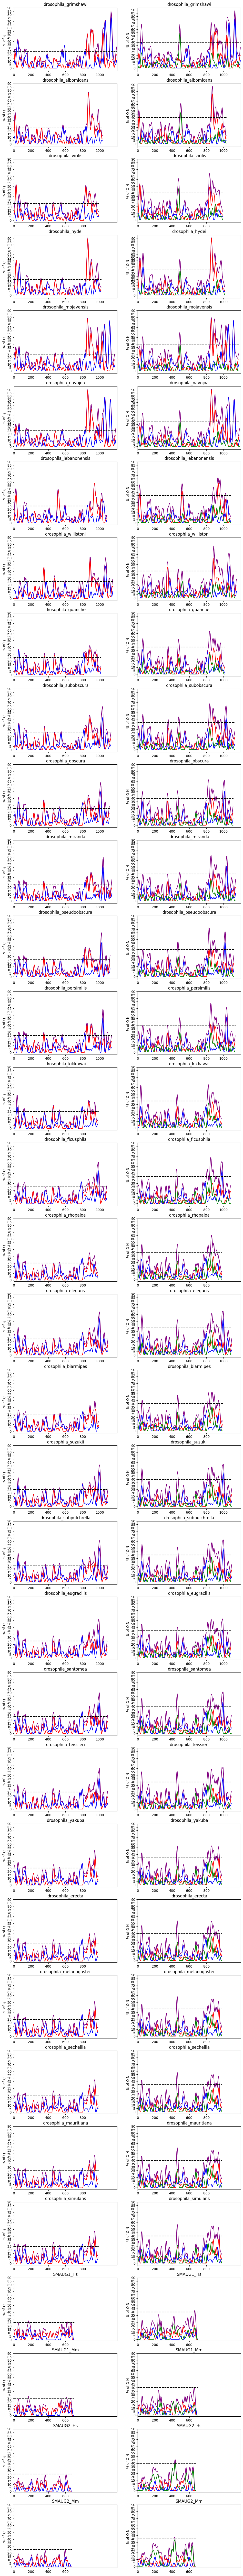